# Pymaceuticals Inc.
---

### Analysis

- Compared to other treatment regimens, it seems that Capomulin is a hot contender for one of the best drugs to treat SCC. It can be clearly seen that tumor volume decreases significantly after continual usage  of Capomulin. While, on average, a mouse's tumor size is larger the more it weighs, Capomulin still successfully lowers tumor volume over a 50 day period. Because the study has an (almost) equal split of males and females, and the tumor volume remains consistent between them, we can infer that the drug will perform as expected, regardless of a mouse's sex. In conclusion, Capomulin performs exceptionally well in comparison to other drugs.
 

In [5]:
# To show Graphs and Plots in VS
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"
# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# Combine the data into a single DataFrame
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice.
unique_mice = mouse_df["Mouse ID"].nunique()
print(unique_mice)

249


In [7]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_df[mouse_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mice = duplicates['Mouse ID'].unique()
print(duplicate_mice)

['g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = mouse_df.drop_duplicates(subset=['Mouse ID'])
clean_mice_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [10]:
# Checking the number of mice in the clean DataFrame. 248
clean_mice_df['Mouse ID'].nunique()

249

## Summary Statistics

In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.



In [12]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
test_df = clean_mice_df.set_index('Drug Regimen')
drug_reg = mouse_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_reg

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

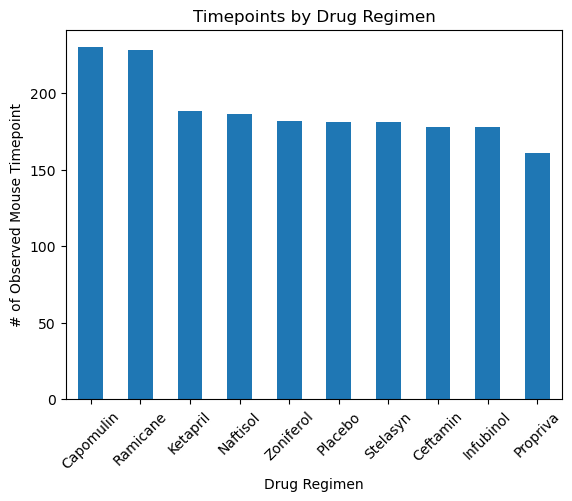

In [13]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_df = mouse_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False)
bar_df.plot(kind='bar', xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoint', title='Timepoints by Drug Regimen')
plt.xticks(rotation=45)
plt.show()

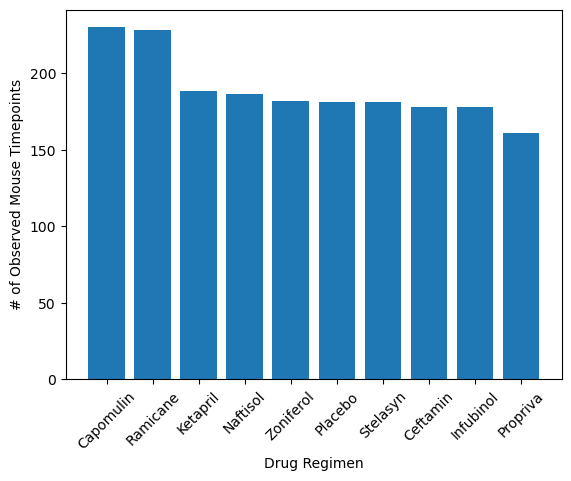

In [14]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_var = bar_df.index
y_var = bar_df.values
plt.bar(x_var, y_var)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=45)
plt.show()

<Axes: ylabel='Sex'>

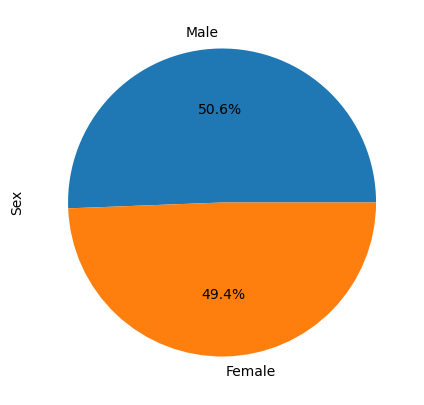

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_df_chart =  mouse_df['Sex'].value_counts().plot(kind='pie', figsize=(5, 5), autopct='%1.1f%%')
pie_df_chart.set_ylabel('Sex')
pie_df_chart

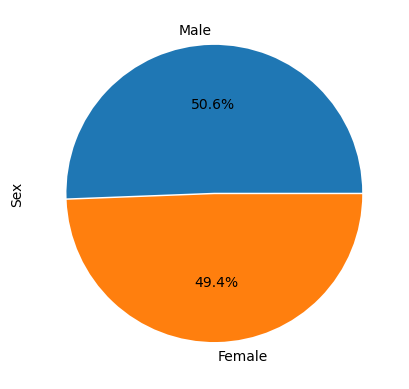

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sexes = mouse_df["Sex"].value_counts()
explode = (0.01, 0)
plt.axes().set_ylabel('Sex')
plt.pie(sexes, labels=labels, autopct='%1.1f%%', explode=explode)
plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
good_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = mouse_df[mouse_df['Drug Regimen'].isin(good_drugs)]
# Start by getting the last (greatest) timepoint for each mouse
last_mouse = final_tumor_volume.groupby('Mouse ID')['Timepoint'].max()
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_mouse_df = pd.merge(mouse_df, last_mouse, on=['Mouse ID', 'Timepoint'])
final_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume_data = []
    treatment_df = final_mouse_df[final_mouse_df['Drug Regimen'] == treatment]
    tumor_volume_data.extend(treatment_df['Tumor Volume (mm3)'])
    # Determine outliers using upper and lower bounds
    series_data = pd.Series(tumor_volume_data)
    q1 = series_data.quantile(0.25)
    q3 = series_data.quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
    #outliers = [(tumor_volume_data > upper_bound) | (tumor_volume_data < lower_bound)]
    outliers = [volume for volume in tumor_volume_data if (volume > upper_bound) or (volume < lower_bound)]
    print(f"{treatment}'s potential outliers: {outliers}")
print(f"The iqr is: {iqr}")
print(f"The first quartile is: {q1}")
print(f"The third quartile is: {q3}")

Capomulin's potential outliers: []
Ramicane's potential outliers: []
Infubinol's potential outliers: [36.3213458]
Ceftamin's potential outliers: []
The iqr is: 15.577752179999997
The first quartile is: 48.72207785
The third quartile is: 64.29983003


{'whiskers': [<matplotlib.lines.Line2D at 0x1f8badd8700>,
 'caps': [<matplotlib.lines.Line2D at 0x1f8badd81f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1f8badda6e0>,
 'medians': [<matplotlib.lines.Line2D at 0x1f8badd9a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x1f8badd8430>,
 'means': []}

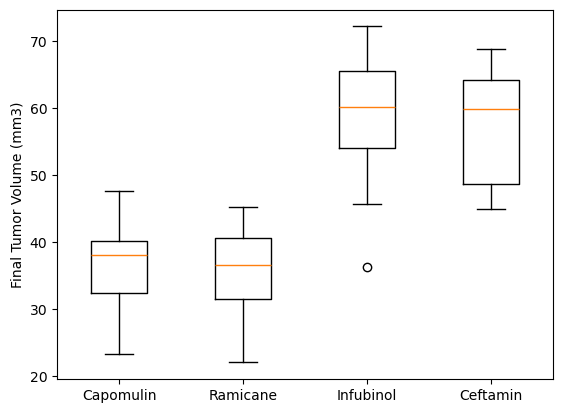

In [19]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Capo = final_mouse_df[final_mouse_df['Drug Regimen'] == "Capomulin"]['Tumor Volume (mm3)']
Rami  = final_mouse_df[final_mouse_df['Drug Regimen'] == "Ramicane"]['Tumor Volume (mm3)']
Infu = final_mouse_df[final_mouse_df['Drug Regimen'] == "Infubinol"]['Tumor Volume (mm3)']
Ceft = final_mouse_df[final_mouse_df['Drug Regimen'] == "Ceftamin"]['Tumor Volume (mm3)']
data = [Capo, Rami, Infu, Ceft]
fig, ax = plt.subplots()
ax.set_ylabel("Final Tumor Volume (mm3)")
plt.boxplot(data, labels=treatments)

## Line and Scatter Plots

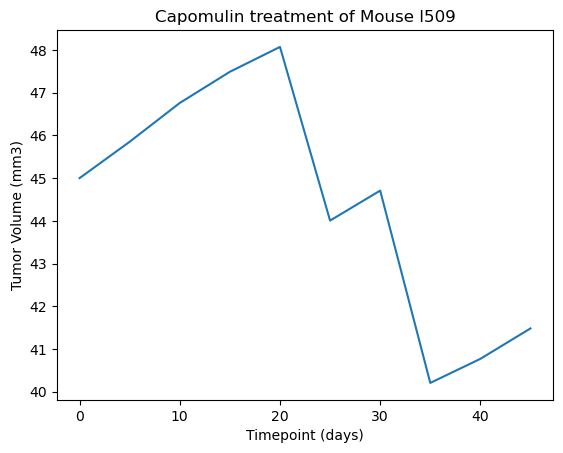

In [20]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509_time = mouse_df[mouse_df['Mouse ID'] == "l509"]['Timepoint']
mouse_l509_tumor = mouse_df[mouse_df['Mouse ID'] == "l509"]['Tumor Volume (mm3)']
plt.plot(mouse_l509_time, mouse_l509_tumor)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of Mouse l509")
plt.show()


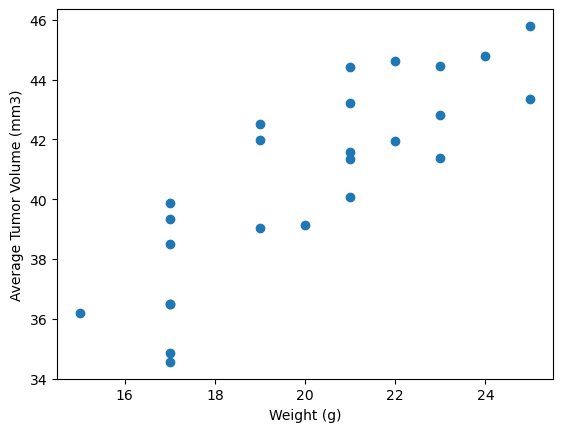

In [21]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_specific_data = mouse_df[mouse_df['Drug Regimen'] == 'Capomulin']
mouse_weight = capomulin_specific_data.groupby('Mouse ID')['Weight (g)'].mean()
average_tumor_vol = capomulin_specific_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
plt.scatter(mouse_weight, average_tumor_vol)
#plt.xlim(0,len(mouse_weight))
#plt.ylim(34,46)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

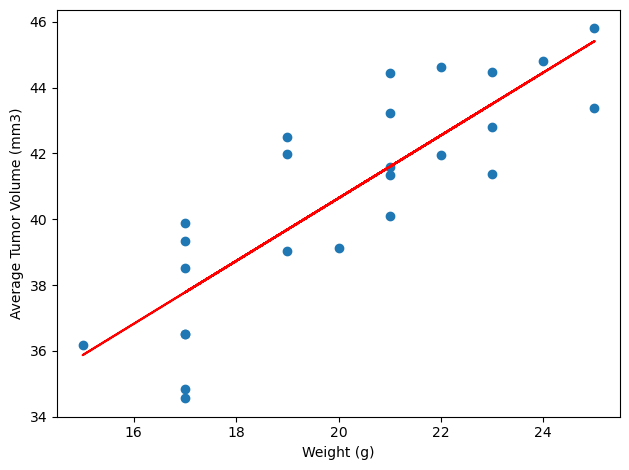

The correlation between mouse weight and the average tumor volume is 0.84


In [23]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
avg_tumor_volume = capomulin_specific_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
correlation_coefficient = avg_tumor_volume.corr(mouse_weight)
slope, intercept, r_value, p_value, std_err = linregress(mouse_weight, avg_tumor_volume)
plt.scatter(mouse_weight, avg_tumor_volume)
plt.plot(mouse_weight, intercept + slope * mouse_weight, color='red')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout()
plt.show()
print(f"The correlation between mouse weight and the average tumor volume is {correlation_coefficient:.2f}")